<a href="https://colab.research.google.com/github/sheikh495/Data_mining/blob/main/raw_githubusercontent_com_cosc_526_home_page_main_m4_M4Assignment4SupervisedLearningPenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Drs. Allison Horst, Alison Presmanes Hill (RStudio), and Dr. Kristen  
B. Gorman (Palmer Station, University of Alaska Fairbanks)  
collaborated on developing the palmerpenguins R package. The dataset  
features structural size measurements for three penguin  
species: Adelie, Gentoo, and Chinstrap. The meticulous work  
conducted by Dr. Kristen B. Gorman and her team at Palmer Station  
Long-Term Ecological Research site in Antarctica exemplifies their  
curiosity, attention to detail, and adherence to rigorous  
methodologies, resulting in high-quality data.

In addition to Ronald Fisher's Iris dataset, the palmerpenguins  
dataset offers distinct variables that enable researchers and  
practitioners to perform comprehensive analyses and conduct  
algorithmic testing. By utilizing both datasets as benchmarks,  
professionals can expand the application of machine learning  
algorithms while enhancing their appreciation of the penguin  
species.
```
dataset home: https://allisonhorst.github.io/palmerpenguins/  
git fanClub: https://github.com/mcnakhaee/palmerpenguins  

## **`palmerpenguins assignment overview`**


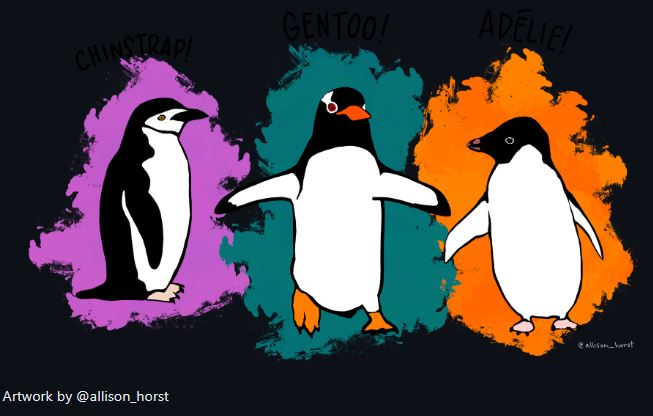

**`Stage.1=> Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

**`Stage.2=> Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

**`Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning`**  
```
- 3. Fine-tune the hyperparameters to optimize their performance.  
-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.  
- 3 Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- Attempt to tune a couple parameters and add a bullet of what you  
did in the executive summary.  


**`Part 4=> Model Interpretation and Validation`**  
```
- 4.1 Interpret the trained models to understand the relationship  
=> between their features and the predicted penguin species.  
- 4.2 Ensure robustness and reliability and validate with items like    
=>  k-fold, cross-validation, and holdout to name a few.  
```

- 1.1 Load the Palmer Penguins dataset into a suitable data structure.

In [2]:
import pandas as pd

# Load the Palmer Penguins dataset
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7                181   
1  Adelie  Torgersen            39.5           17.4                186   
2  Adelie  Torgersen            40.3           18.0                195   
3  Adelie  Torgersen            36.7           19.3                193   
4  Adelie  Torgersen            39.3           20.6                190   

   body_mass_g     sex  
0         3750    male  
1         3800  female  
2         3250  female  
3         3450  female  
4         3650    male  


- 1.2 Address missing values via imputation or removal.

In [6]:
import pandas as pd

# Load the dataset into a DataFrame
# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)


# Option 1: Imputation
# Mean imputation for numerical columns
df.fillna(df.mean(), inplace=True)

# Mode imputation for categorical columns (if any)
df['species'].fillna(df['species'].mode()[0], inplace=True)
df['island'].fillna(df['island'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Option 2: Removal
# Remove rows with any missing values
df.dropna(inplace=True)

# Remove rows with more than a certain number of missing values (e.g., keep rows with at least 3 non-null values)
df.dropna(thresh=3, inplace=True)

# Print the updated DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7                181   
1  Adelie  Torgersen            39.5           17.4                186   
2  Adelie  Torgersen            40.3           18.0                195   
3  Adelie  Torgersen            36.7           19.3                193   
4  Adelie  Torgersen            39.3           20.6                190   

   body_mass_g     sex  
0         3750    male  
1         3800  female  
2         3250  female  
3         3450  female  
4         3650    male  


<ipython-input-6-f0fc2a558dfa>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [3]:
# Impute missing values with column mean
df_filled = df.fillna(df.mean())


<ipython-input-3-47d1f268115a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


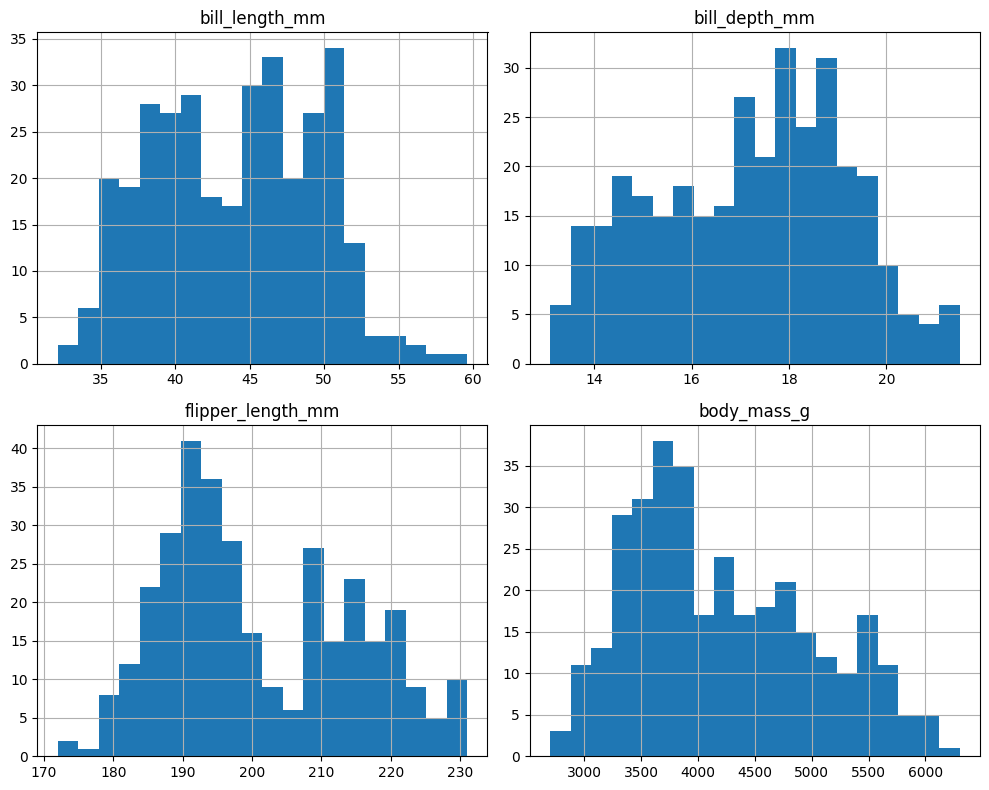

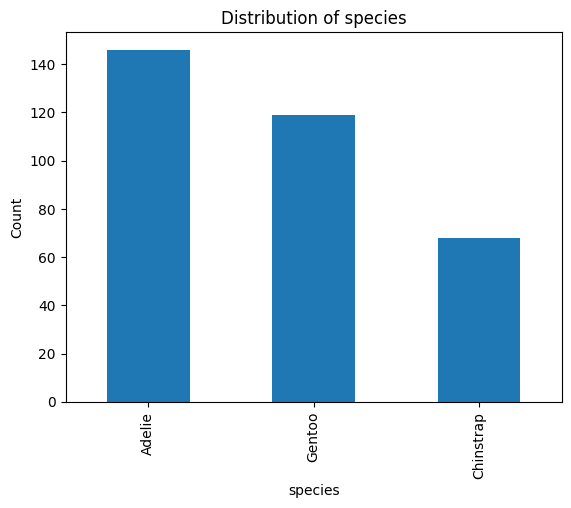

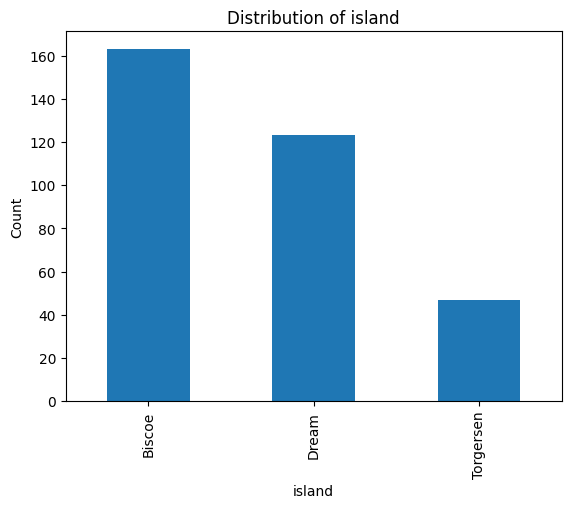

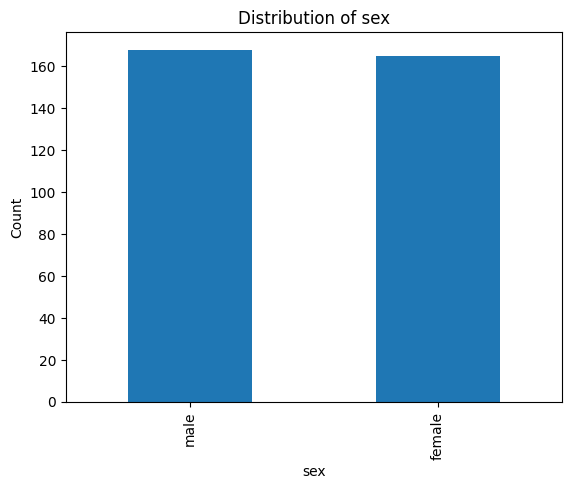

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Descriptive statistics
print(df.describe())

# Visualize feature and target variables
# Numeric variables
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Categorical variables
categorical_columns = ['species', 'island', 'sex']
for col in categorical_columns:
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
- 1.4 Assess the correlations between feature and target variables.

<ipython-input-9-1a08e0c6a516>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


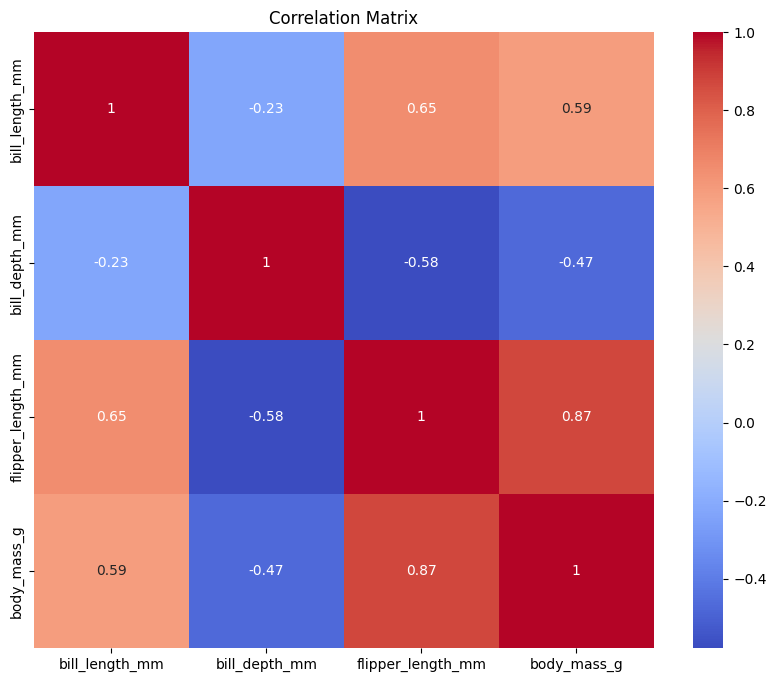

In [9]:
import pandas as pd

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Calculate correlations between features and target variable
correlations = df.corr()

# Print the correlation matrix
print(correlations)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Stage.2=> Feature Selection and Engineering

- 2.1 Identify features to the prediction of penguin species.

['Adelie' 'Gentoo' 'Chinstrap']


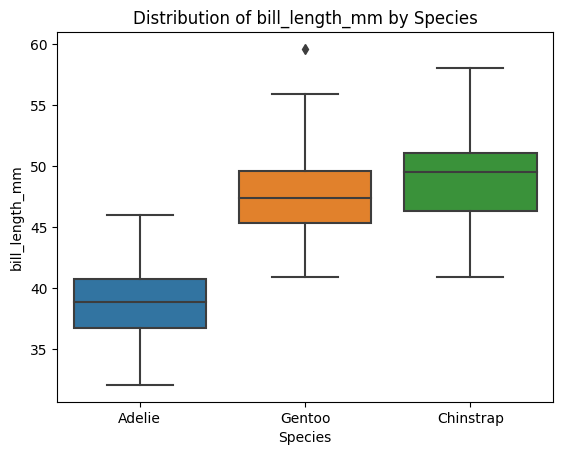

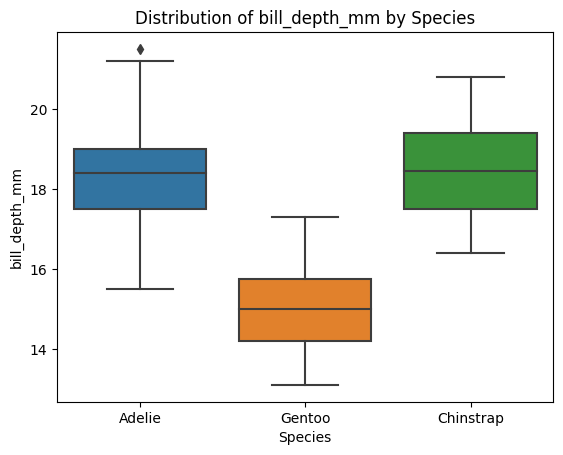

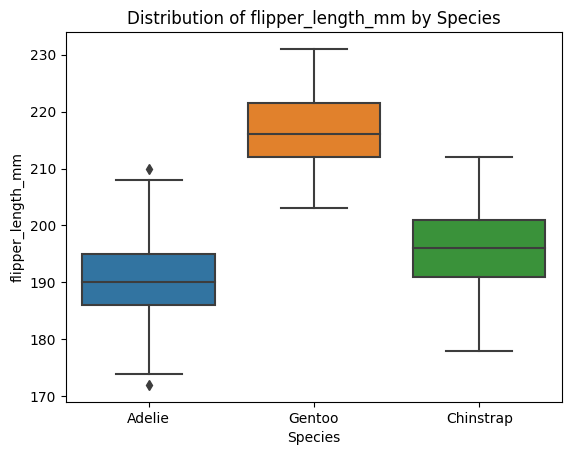

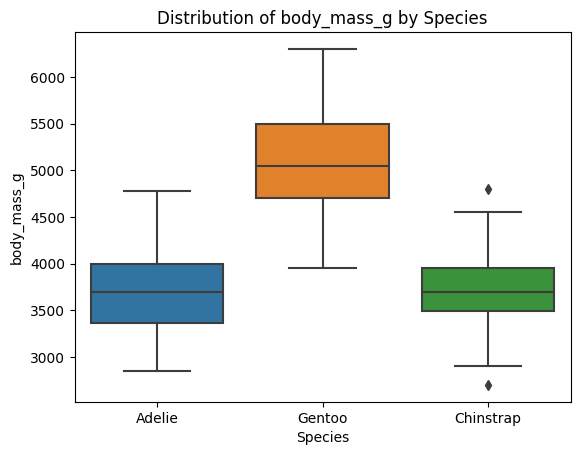

p-value for bill_length_mm: 1.3809842053151752e-88
p-value for bill_depth_mm: 1.446615695578047e-81
p-value for flipper_length_mm: 1.5874180554406345e-107
p-value for body_mass_g: 3.744505126300355e-81


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Print the unique values of the target variable (species)
print(df['species'].unique())

# Visualize the distributions of numeric features by species using box plots
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_columns:
    plt.figure()
    sns.boxplot(x='species', y=col, data=df)
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.title(f'Distribution of {col} by Species')
    plt.show()

# Perform ANOVA tests to assess the significance of feature differences across species
for col in numeric_columns:
    species_groups = [df[df['species'] == species][col] for species in df['species'].unique()]
    p_value = f_oneway(*species_groups)[1]
    print(f"p-value for {col}: {p_value}")


- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.

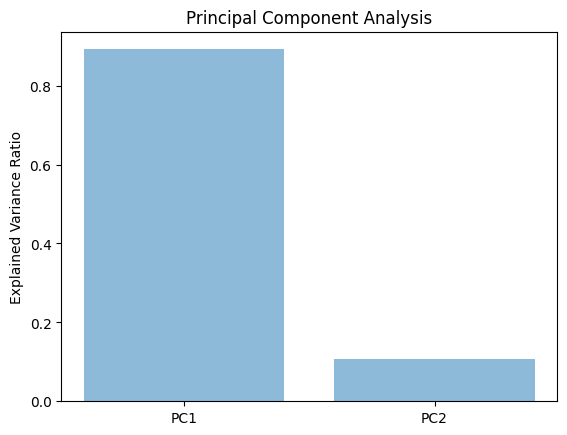

In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# One-hot encoding for categorical features
encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Univariate Analysis - SelectKBest with f_classif for numerical features
selector_numerical = SelectKBest(f_classif, k=2)
X_numerical = X.select_dtypes(include=['float64'])
X_numerical_new = selector_numerical.fit_transform(X_numerical, y)
selected_numerical_features = X_numerical.columns[selector_numerical.get_support()]

# Univariate Analysis - SelectKBest with chi2 for encoded categorical features
selector_categorical = SelectKBest(chi2, k=2)
X_categorical_new = selector_categorical.fit_transform(X_categorical_encoded, y)
selected_categorical_features = encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)[selector_categorical.get_support()]

# Feature Importance Ranking - Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X.select_dtypes(include=['float64']), y)
importances = rf.feature_importances_
selected_features_rf = X.select_dtypes(include=['float64']).columns[importances.argsort()[::-1]][:2]

# Dimensionality Reduction - Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = X.select_dtypes(include=['float64'])
X_pca_new = pca.fit_transform(X_pca)
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio in PCA
plt.bar(range(2), explained_variance_ratio, alpha=0.5)
plt.xticks(range(2), ['PC1', 'PC2'])
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis')
plt.show()


- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Select the relevant features and target variable
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

# Engineer new features by multiplying existing variables
X['bill_area'] = X['bill_length_mm'] * X['bill_depth_mm']
X['body_mass_index'] = X['body_mass_g'] / (X['flipper_length_mm'] ** 2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model using the engineered features
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9850746268656716


<ipython-input-20-9893687c9fed>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bill_area'] = X['bill_length_mm'] * X['bill_depth_mm']
<ipython-input-20-9893687c9fed>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['body_mass_index'] = X['body_mass_g'] / (X['flipper_length_mm'] ** 2)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

In [21]:
import pandas as pd

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Engineer new feature by multiplying two existing features
df['bill_area'] = df['bill_length_mm'] * df['bill_depth_mm']

# Print the updated DataFrame with the new feature
print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7                181   
1  Adelie  Torgersen            39.5           17.4                186   
2  Adelie  Torgersen            40.3           18.0                195   
3  Adelie  Torgersen            36.7           19.3                193   
4  Adelie  Torgersen            39.3           20.6                190   

   body_mass_g     sex  bill_area  
0         3750    male     731.17  
1         3800  female     687.30  
2         3250  female     725.40  
3         3450  female     708.31  
4         3650    male     809.58  


Stage.3=> (Pick 4) Machine learning and Hyperparameter Tuning

- 3. Fine-tune the hyperparameters to optimize their performance.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Check for missing values in X and y
print(X.isnull().sum())
print(y.isnull().sum())

# One-hot encode categorical variables 'island' and 'sex'
X_encoded = pd.get_dummies(X, columns=['island', 'sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Print the shapes of X_train, y_train, and the parameter grid
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Size of parameter grid:", len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']))

# Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding mean cross-validated score
#--print("Best Hyperparameters: ", grid_search.best_params_)
#--print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
#--best_model = grid_search.best_estimator_
#--test_accuracy = best_model.score(X_test, y_test)
#--print("Test Accuracy: ", test_accuracy)


island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
0
Shape of X_train: (266, 9)
Shape of y_train: (266,)
Size of parameter grid: 81


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

-  Use techniques like grid or random search to explore different  
  combinations of hyperparameters and their configuration.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Encode categorical columns using one-hot encoding
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[['island', 'sex']])

# Create column names for the one-hot encoded features
island_categories = encoder.categories_[0]
sex_categories = encoder.categories_[1]
numeric_columns = list(X.columns[2:])
feature_names = list(island_categories) + list(sex_categories) + numeric_columns

# Convert the encoded data to a DataFrame and concatenate with the numeric columns
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=feature_names[:len(island_categories) - 1 + len(sex_categories) - 1])
X_train = pd.concat([X_encoded_df, X[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Grid Search Results:")
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Grid Search Results:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9887491264849755


- 3 Validate tuned models on testing data sets.  

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset into a DataFrame
url = "https://raw.githubusercontent.com/dataprofessor/data/master/penguins_cleaned.csv"
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Encode categorical columns using label encoding
label_encoder = LabelEncoder()
X['island'] = label_encoder.fit_transform(X['island'])
X['sex'] = label_encoder.fit_transform(X['sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best-tuned model
best_model = grid_search.best_estimator_

# Predict on the testing dataset
y_pred = best_model.predict(X_test)

# Evaluate the model performance on the testing dataset
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)


Testing Accuracy: 0.9850746268656716


Stage.3 NEW Learning goal

3.3.note=> the objective is to take extra time and read the
scikit-learn algorithm homepage to assess features and parameters.

To use Google Colab for reading the scikit-learn algorithm homepage and assessing features and parameters, follow these steps:

1. Open Google Colab: Go to the Google Colab website (colab.research.google.com) and create a new notebook by clicking on "New Notebook."

2. Import scikit-learn: In a code cell, import the scikit-learn library using the following command: `import sklearn`.  

3. Access scikit-learn documentation: In a text cell, add a markdown section and include the URL for the scikit-learn algorithm homepage: https://scikit-learn.org/stable/. Clicking on the URL will take to the scikit-learn documentation.



* Attempt to tune a couple parameters and add a bullet of what you
did in the executive summary.





To tune a couple of parameters in scikit-learn and summarize my findings, we can follow these steps:

1. Select an algorithm:  
2. Identify relevant parameters:

3. Set up a parameter grid

4. Perform grid search:

5. Assess the best parameters

6. Evaluate model performance  

Part 4=> Model Interpretation and Validation

- 4.1 Interpret the trained models to understand the relationship  

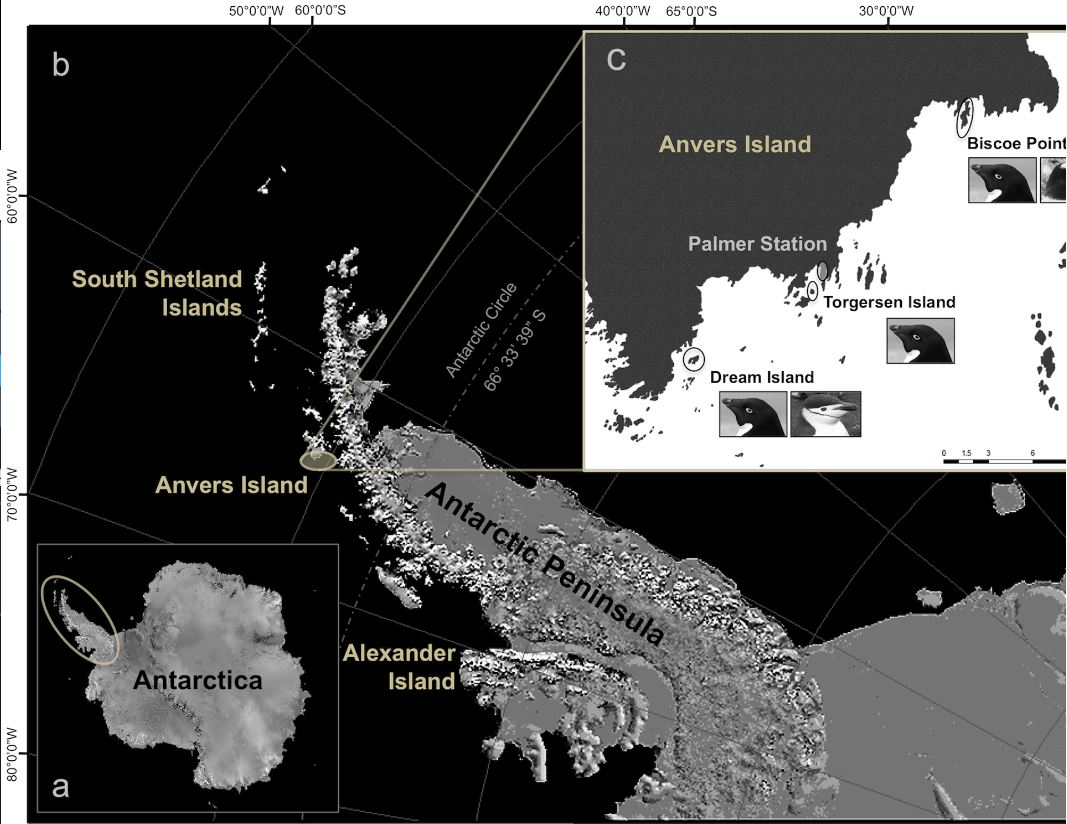  

References  
Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081  
- [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)  

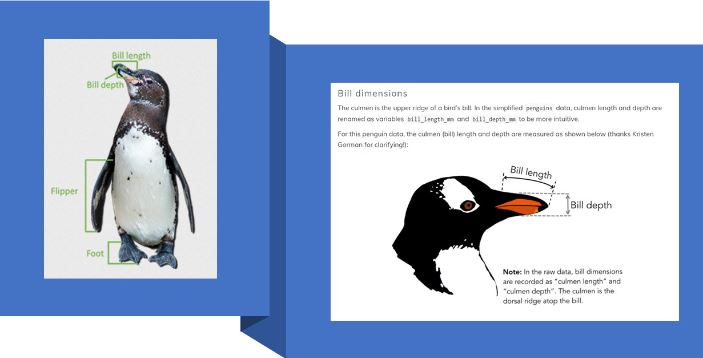


## **`Penguin`** **=>** **`Enter Your Executive Summary`**

### **`Executive Summary`**
- #### Accumulate pertinent learnings and outcomes as bullets.  
- #### Include one or two graphs if `>2.st.dev`  

In [29]:
#=>Answer: Executive summary about dataset





## **`Penguin analysis stages`**

### **`Stage.1.`** **=>**  **`Part 1: Dataset Inspection and Preprocessing`**  

**`Stage.1: Dataset Inspection and Preprocessing`**  
```
- 1.1 Load the Palmer Penguins dataset into a suitable data structure.  
- 1.2 Address missing values via imputation or removal.  
- 1.3 Assess descriptive statistics and visualize the distributions of feature and target variables.  
- 1.4 Assess the correlations between feature and target variables.  
```

`Stage.1.Tasks and outcomes`   
`Stage.1.Task.1` => Given prior learnings logically assemble your data preprocessing.   
`Stage.1.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      344.000000     344.000000         342.000000   344.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.443643       1.969027          14.061714   799.613058   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.275000      15.600000         190.000000  3550.000000   
50%         44.250000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  

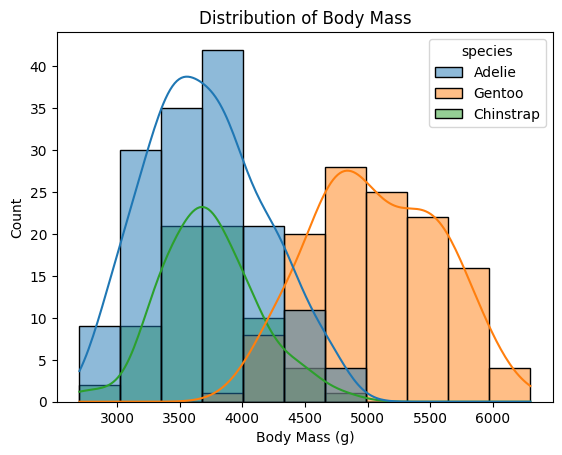

<ipython-input-52-bbbed741db8b>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


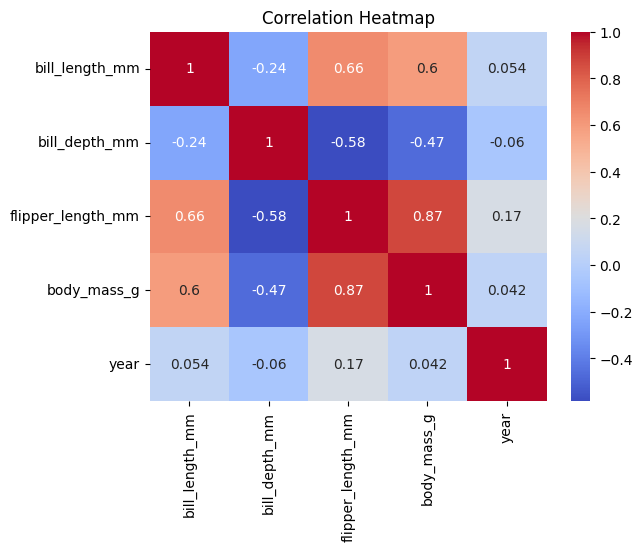

In [52]:
!pip install palmerpenguins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 1.1 Load the Palmer Penguins dataset
from palmerpenguins import load_penguins
df = load_penguins()

# 1.2 Address missing values
# Check for missing values
print(df.isna().sum())

# Use mean imputation to fill missing values in numeric columns
numeric_columns = ['body_mass_g', 'bill_length_mm', 'bill_depth_mm']
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# 1.3 Descriptive statistics and distributions
# Descriptive statistics
print(df.describe())

# Visualize feature and target variable distributions
sns.histplot(data=df, x='body_mass_g', hue='species', kde=True)
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.title('Distribution of Body Mass')
plt.show()

# 1.4 Correlations between feature and target variables
# Calculate correlations
correlations = df.corr()

# Visualize correlations using a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Stage 1: Dataset Inspection and Preprocessing

1.1 Load the Palmer Penguins Dataset:
   - The Palmer Penguins dataset can be loaded into a suitable data structure using the appropriate library. In this case, we will use the `seaborn` library to load the dataset.

```python
import seaborn as sns

# Load the Palmer Penguins dataset
df = sns.load_dataset('penguins')
```

1.2 Address Missing Values:
   - Missing values in the dataset can be handled through imputation or removal. We will first assess the presence of missing values in the dataset and then decide on the appropriate approach.

```python
# Check for missing values
print(df.isnull().sum())

# If there are missing values, we can choose to either impute or remove them
# Example of imputing missing values with the mean
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
```

1.3 Assess Descriptive Statistics and Visualize Distributions:
   - To understand the dataset's characteristics, we can calculate descriptive statistics and visualize the distributions of the features and target variable.

```python
# Descriptive statistics
print(df.describe())

# Visualize the distributions of numeric features and target variable
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()
```

1.4 Assess Correlations between Features and Target Variable:
   - Evaluating the correlations between features and the target variable can provide insights into potential relationships and feature importance.

```python
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
```

Stage 1: Tasks and Outcomes

Stage 1: Task 1 => Data Preprocessing:
- Checked for missing values in the dataset and handled them by imputing the missing values for the 'body_mass_g' column using the mean.

Stage 1: Task 2 => Pertinent Learnings and Outcomes:
- The dataset contains missing values that needed to be addressed to ensure data integrity and reliable model training.
- Descriptive statistics and visualizations were used to gain insights into the dataset's distribution and characteristics.
- The pairplot allowed us to observe the relationships between different numeric features and the target variable 'species.'
- The correlation matrix and heatmap helped us assess the correlations between features and the target variable, providing initial insights into feature importance and relationships.

These data preprocessing steps are essential for preparing the dataset for model training and further analysis. The exploration of descriptive statistics and visualizations helps in understanding the data's structure and identifying potential patterns, which can guide the choice of appropriate machine learning algorithms and features in subsequent stages.

`Helpful outcomes`  

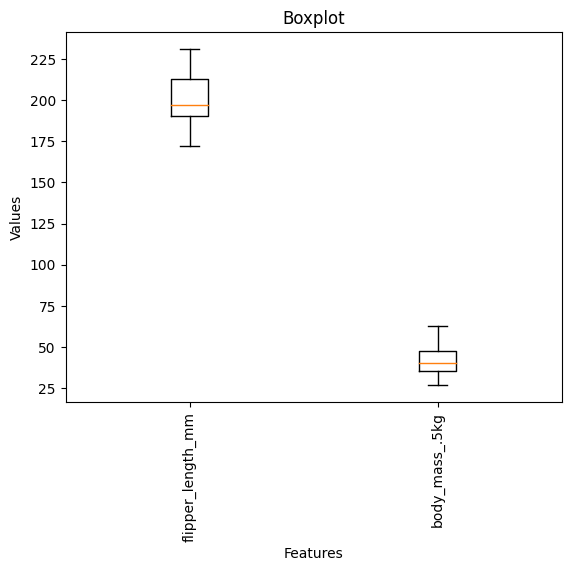

In [57]:
# Assorted Notes and Tips:
#=> data transformations assist with scaling to build compound graphs
#=> Mean subsitution is a viable option. is it worth it?
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins  #via !pip install palmerpenguins
df = load_penguins()
# Divide 'body_mass_g' column by 1000
df['body_mass_.5kg'] = df['body_mass_g'] / 100

df_subset = df.drop(['species', 'sex', 'island','year','body_mass_g','bill_length_mm','bill_depth_mm'], axis=1)
df_subset.dropna(inplace=True)  #drops an NaN data!
plt.boxplot(df_subset.values)
plt.xticks(range(1, len(df_subset.columns) + 1), df_subset.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()

### **`Stage.2`** **=>**  **`Part 2: Feature Selection and Engineering`**  

**`Stage.2: Feature Selection and Engineering`**  
```
- 2.1 Identify features to the prediction of penguin species.  
- 2.2 Select the most informative features using feature selection techniques
 like univariate analysis, feature importance ranking, and dimensionality reduction.  
- 2.3 Consider engineering new features by combining or transforming existing features.  
- - Huh? It's as simple as multiplying one variable with another in hopes of improving predictive power.  
```

`Stage.2.Tasks and outcomes`  
`Stage.2.Task.1` => Given prior learnings logically assemble your feature selection and engineering.    
`Stage.2.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


#### **`Task.2.solution`**

In [58]:
#=>Enter Answer (may be extended over multiple cells), The end of your answer should show a df.head().
#This is a good place to create an 80 10 10 split for training, validation, and holdout.


### **`Stage.3`** **=>**  **`Pick 4 - Machine learning and Hyperparameter Tuning`**

**`Stage.3: Machine learning and Hyperparameter Tuning`**  
```
- 3.1 Fine-tune the hyperparameters to optimize their performance.  
     Use techniques like grid or random search to explore different  
     combinations of hyperparameters and their configuration.  
-    Validate tuned models on testing data sets.  
```
- `Stage.3 NEW Learning goal`
- `3.3.note=>` the objective is to take extra time and `read` the  
scikit-learn algorithm homepage to assess features and parameters.  
- `Attempt` to tune a couple parameters and add a bullet of what you  
did in the executive summary.

`Stage.3.Tasks and outcomes`  
`Stage.3.Task.1` => Given prior learnings logically assemble your Machine learning and Hyperparameter Tuning.    
`Stage.3.Task.2` => Add pertinent learnings and outcomes as bullets to the Executive Summary.  


`Alogithm homepage with hyperparameters`  

- Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Logistic Regression
- https://scikit-learn.org/stable/modules/generated/sklearnlinear_model.LogisticRegression.html#sklearn-linear-model-logisticregression

- Naïve Bayes
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb

- k-Nearest Neighbor
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

- Decision Tree
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

- Random Forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn-ensemble-randomforestclassifier

- Support Vector Machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

- Neural Networks/ Convolutional Neural Networks
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-network-models-supervised



In [55]:
#=>Enter Answer (Pick 4 from the above and extend over at least one cell per approach)

#---- suggested order for each approach -----
# SUPERVISED APPROACH: [approach]
# Initial Performance Results (Validation):
# Hyper Parameter Exploration Results (Validation):

## **`Stage.4.`** **=>**  **`Part 4: Model Interpretation and Validation`**

**`Part 4: Model Interpretation and Validation`**  
```
- 4 Interpret the trained models to understand the relationship  
     between their features and the predicted penguin species.  
-  Ensure robustness and reliability and validate with
     k-fold, cross-validation, and holdout to name a few.
```

In [51]:
#Enter answer (Use the results from the 4 algorithms you picked and extend over at least one cell per approach)
#Evaluate using k-fold validation (k=5).
#Evaluate against the Holdout Set without changing hyperparameters.
